In [128]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.fft import fft, ifft,fftshift
import control
import sympy as sp

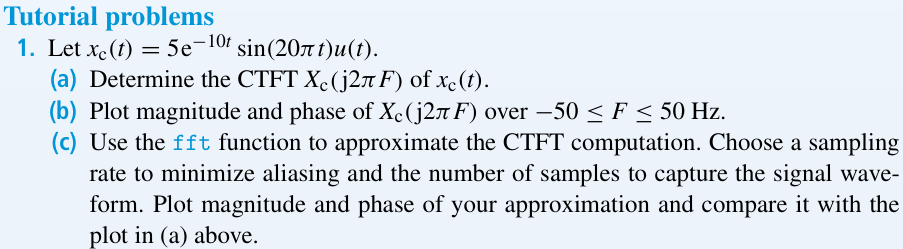

# a)

F=10

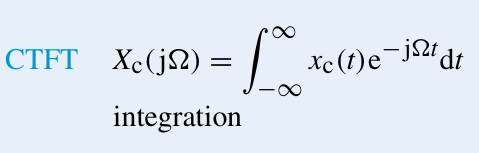

\begin{align*}
x_c(t)&=5 e^{-10t}sin(2\pi F t)u(t)\\
F=10\\\\
X_c (j2\pi F) &=\int _{-\infty} ^{\infty} x_c (t) e^{-j2\pi F} dt\\\\
X_c (j2\pi F) &=\int _{-\infty} ^{\infty} 5 e^{-10t}sin(2\pi F t)u(t) e^{-j2\pi Ft} dt\\\\
&=\int _{0} ^{\infty} 5 e^{-10t}sin(2\pi F t) e^{-j2\pi Ft} dt\\\\
&=\int _{0} ^{\infty} 5/2j e^{-10t}(e^{j(2\pi F t)}-e^{-j(2\pi F t)}) e^{-j2\pi Ft} dt\\\\
&=5/2j \int _{0} ^{\infty}  (e^{t(j(2\pi F)-10)}-e^{t(-j(2\pi F)-10)}) e^{-j2\pi Ft} dt\\\\
\end{align*}

\begin{align*}
&=5/2j \int _{0} ^{\infty}  e^{t(j(2\pi F)-10-j2\pi F)}-e^{t(-j(2\pi F)-10-j2\pi F)}dt\\\\
&=5/2j \int _{0} ^{\infty}  e^{t(-10)}-e^{t(-10-4j\pi F)}dt\\\\
\end{align*}

\begin{align*}
X_c (j2\pi F) &= 5/2j (\frac{1}{-10} e^{-10t})\rvert{}_{0} ^{\infty}-5/2j (\frac{1}{-10-4j\pi F} e^{t(-10-4j \pi F)})\rvert{}_{0} ^{\infty}\\\\
&= 5/2j (\frac{1}{10})-5/2j (\frac{1}{10+4j\pi F})\\
\end{align*}

Jeg bruger sympys CTFT som giver $CTFT(j2\pi F)$

In [20]:
t,F=sp.symbols('t,F')
sp.integrals.transforms.fourier_transform(5*sp.exp(-10*t)*sp.sin(20*sp.pi*t)*sp.Heaviside(t,1),t,F)

25*pi/((I*pi*F + 5)**2 + 100*pi**2)

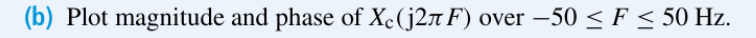

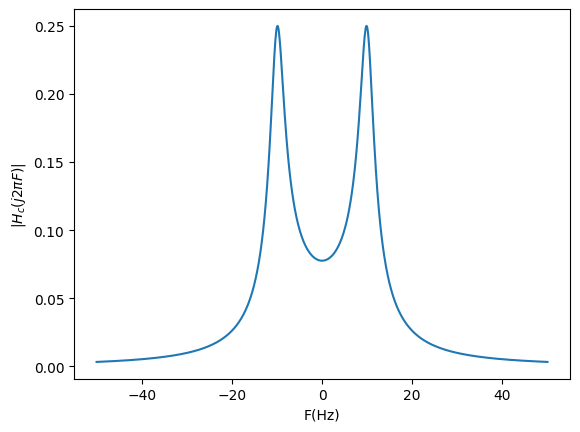

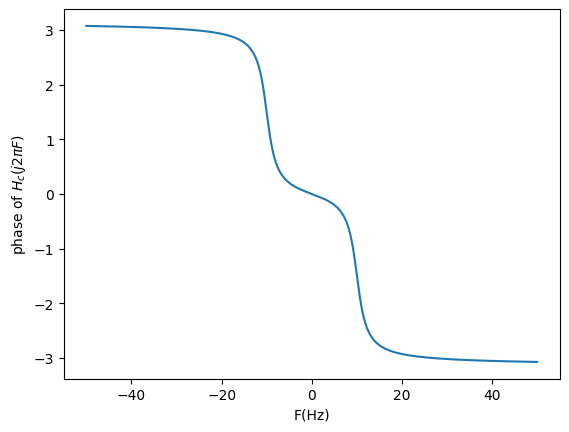

In [22]:
def Hj2pi(F):
    return (25*np.pi)/((1j*np.pi*F+5)**2+100*np.pi*np.pi)
Freq=np.linspace(-50,50,1000)
plt.plot(Freq,abs(Hj2pi(Freq)))
plt.xlabel("F(Hz)")
plt.ylabel("$|H_c (j2\pi F)|$")
plt.show()
plt.plot(Freq,np.angle(Hj2pi(Freq)))
plt.xlabel("F(Hz)")
plt.ylabel("phase of $H_c (j2\pi F)$")
plt.show()


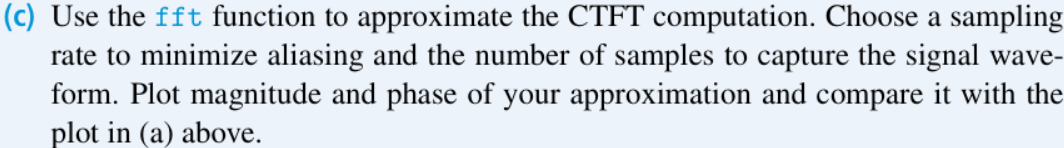

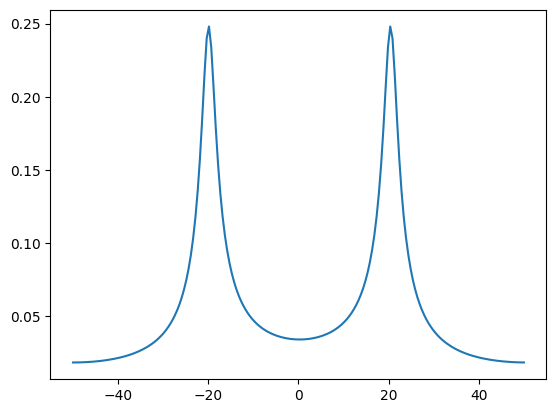

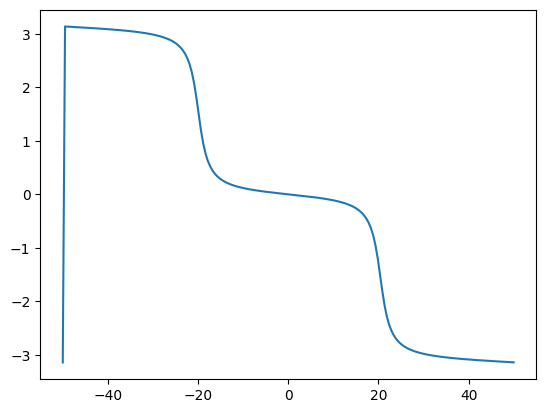

In [64]:
t0=0
t1=2
F0=10
Fs=10*F0
Ts=1/Fs
nT=np.linspace(t0,t1,(t1-t0)*Fs)
xn=5*np.exp(-10*nT)*np.sin(40*np.pi*nT)
Xfft=Ts*fftshift(fft(xn))
Freq=np.linspace(-50,50,(t1-t0)*Fs)
plt.plot(Freq,abs(Xfft))
plt.show()
plt.plot(Freq,np.angle(Xfft))
plt.show()


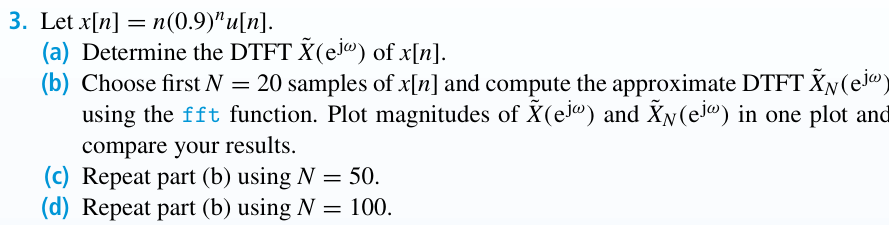

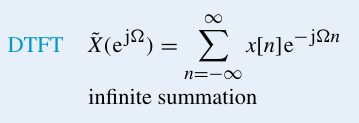

smart

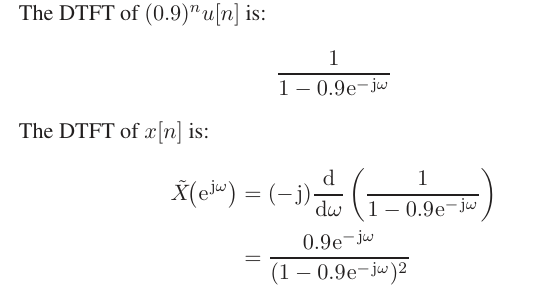

\begin{align*}
&\sum _{n=-\infty} ^{\infty} (0.9)^n u[n] e^{-j\Omega n}\\
&\sum _{n=0} ^{\infty} (0.9e^{-j\Omega})^n\\
&=\frac{1}{1-0.9e^{-j\Omega}}
\end{align*}

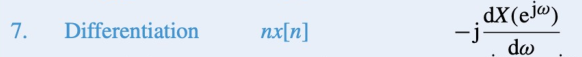

$$X(e^{j\Omega})=(-j)\frac{d}{d\Omega} \frac{1}{1-0.9e^{-j\Omega}}$$

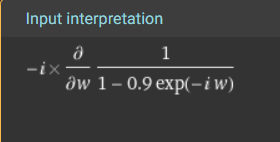

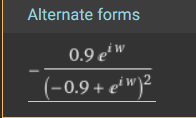

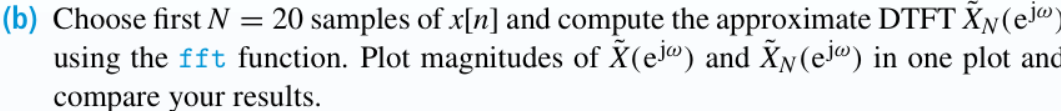

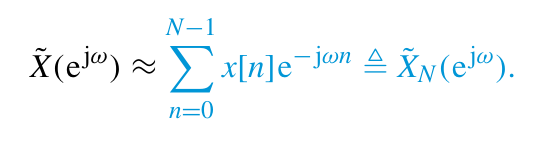

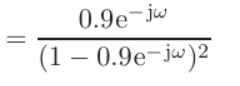

In [92]:
def Xanalysis(omega):
    return (0.9*np.exp(-1j*omega))/((1-0.9*np.exp(-1j*omega))**2)
def N_DTFT(x,omega):
    XN_dtft=0
    for i in range(len(x)):
        XN_dtft+=xn[i]*np.exp(-1j*omega*i)
    return XN_dtft

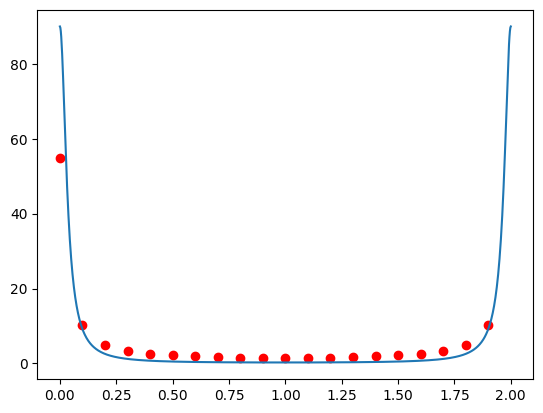

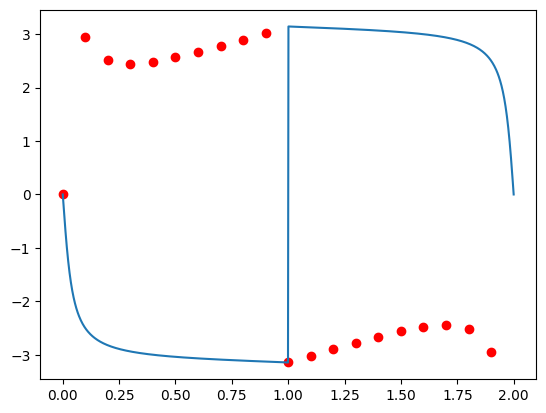

In [122]:
N=np.arange(0,20)
xn=N*(0.9)**N
o=np.linspace(0,2*np.pi,1000)
XN=fft(xn)
wk=2/20*np.arange(0,20)
plt.scatter(wk,abs(XN),color='r')
plt.plot(o/np.pi,abs(Xanalysis(o)))
plt.show()
plt.scatter(wk,np.angle(XN),color='r')
plt.plot(o/np.pi,np.angle(Xanalysis(o)))
plt.show()

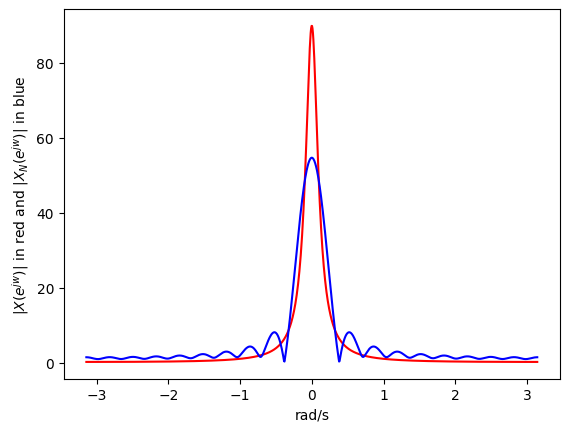

In [96]:
N=np.arange(0,20)
xn=N*(0.9)**N
o=np.linspace(-np.pi,np.pi,1000)
plt.plot(o,abs(Xanalysis(o)),'r')
plt.plot(o,abs(N_DTFT(xn,o)),'b')
plt.xlabel("rad/s")
plt.ylabel("$|X(e^{jw})|$ in red and $|X_N(e^{jw})|$ in blue")
plt.show()

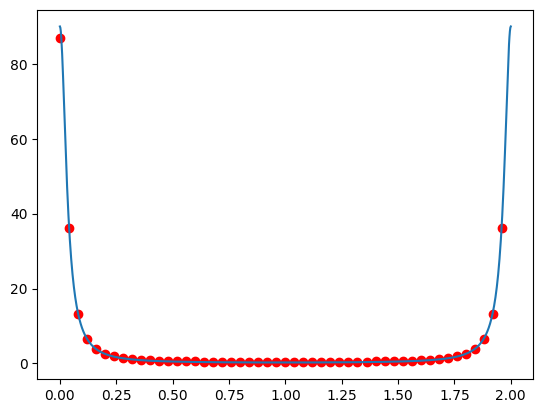

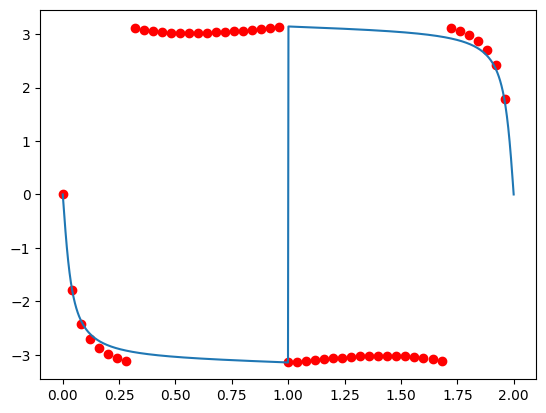

In [123]:
N=np.arange(0,50)
xn=N*(0.9)**N
o=np.linspace(0,2*np.pi,1000)
XN=fft(xn)
wk=2/50*np.arange(0,50)
plt.scatter(wk,abs(XN),color='r')
plt.plot(o/np.pi,abs(Xanalysis(o)))
plt.show()
plt.scatter(wk,np.angle(XN),color='r')
plt.plot(o/np.pi,np.angle(Xanalysis(o)))
plt.show()

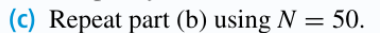

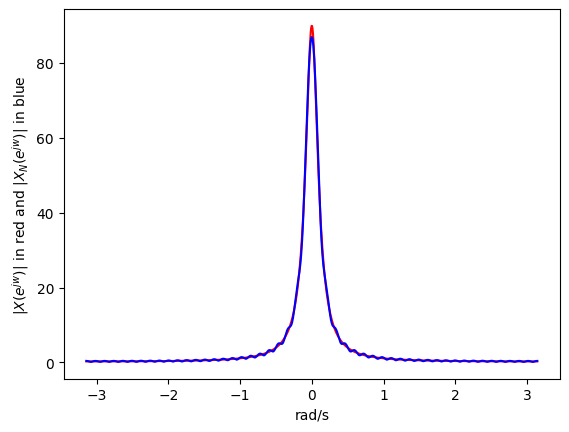

In [88]:
N=np.arange(0,50)
xn=N*(0.9)**N
o=np.linspace(-np.pi,np.pi,1000)
plt.plot(o,abs(Xanalysis(o)),'r')
plt.plot(o,abs(N_DTFT(xn,o)),'b')
plt.xlabel("rad/s")
plt.ylabel("$|X(e^{jw})|$ in red and $|X_N(e^{jw})|$ in blue")
plt.show()

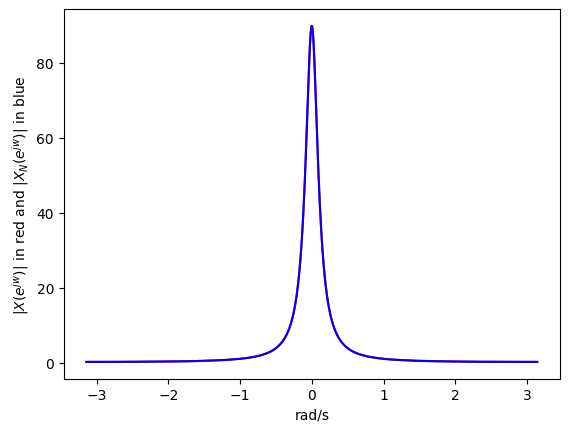

In [87]:
N=np.arange(0,100)
xn=N*(0.9)**N

o=np.linspace(-np.pi,np.pi,1000)
plt.plot(o,abs(Xanalysis(o)),'r')
plt.plot(o,abs(N_DTFT(xn,o)),'b')
plt.xlabel("rad/s")
plt.ylabel("$|X(e^{jw})|$ in red and $|X_N(e^{jw})|$ in blue")
plt.show()

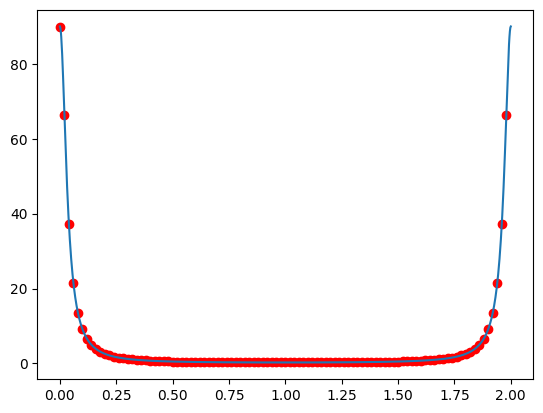

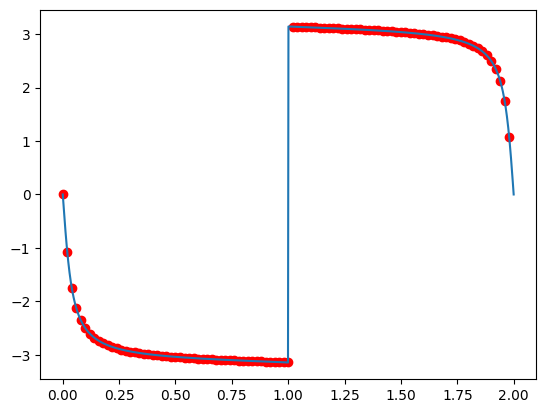

In [127]:
N=np.arange(0,100)
xn=N*(0.9)**N
o=np.linspace(0,2*np.pi,1000)
XN=fft(xn)
wk=2/100*np.arange(0,100)
plt.scatter(wk,abs(XN),color='r')
plt.plot(o/np.pi,abs(Xanalysis(o)))
plt.show()
plt.scatter(wk,np.angle(XN),color='r')
plt.plot(o/np.pi,np.angle(Xanalysis(o)))
plt.show()

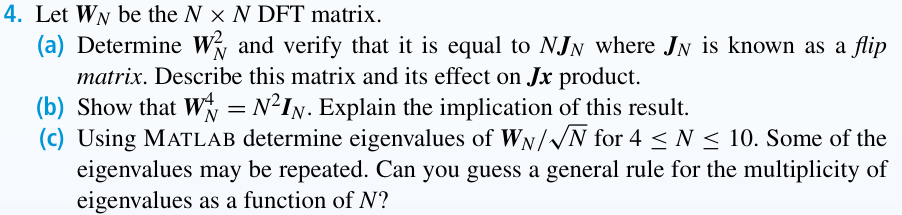

# a)

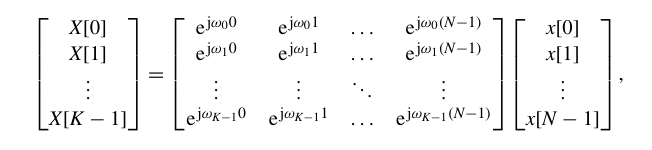

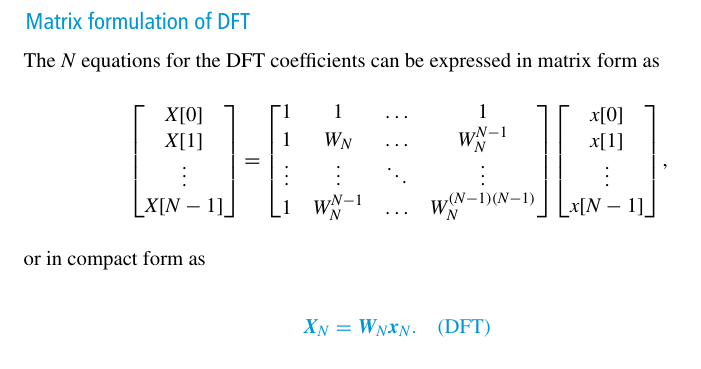

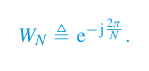

$$
\begin{bmatrix}
1 & 1 & \dots & 1\\
1 & W_N & \dots & W_N ^{N-1}\\
\vdots & \vdots& \ddots & \vdots \\ 
1 & W_N ^{N-1} & \dots & W_N ^{(N-1)(N-1)}\\
\end{bmatrix}
\cdot
\begin{bmatrix}
1 & 1 & \dots & 1\\
1 & W_N & \dots & W_N ^{N-1}\\
\vdots &\vdots& \ddots & \vdots \\ 
1 & W_N ^{N-1} & \dots & W_N ^{(N-1)(N-1)}\\
\end{bmatrix}
$$

$$
\begin{bmatrix}
N & N & \dots & N\\
N & N(W_N) & \dots & W_N ^{N-1}\\
\vdots & \vdots& \ddots & \vdots \\ 
N & W_N ^{N-1} & \dots & W_N ^{(N-1)(N-1)}\\
\end{bmatrix}$$

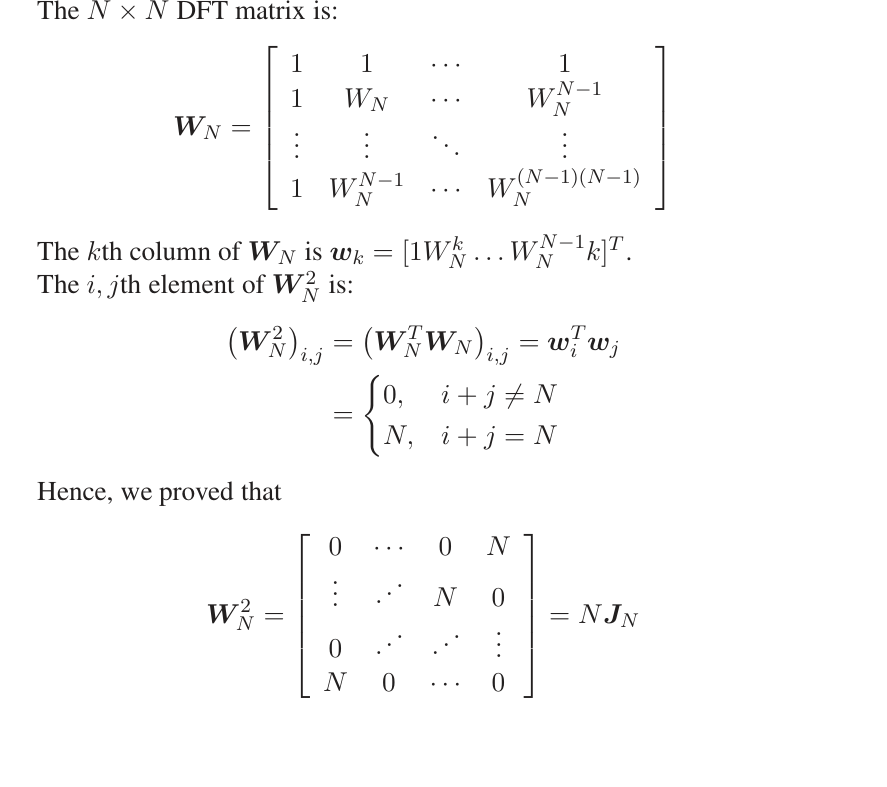

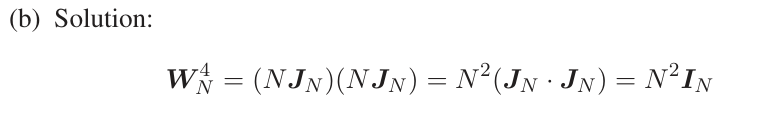

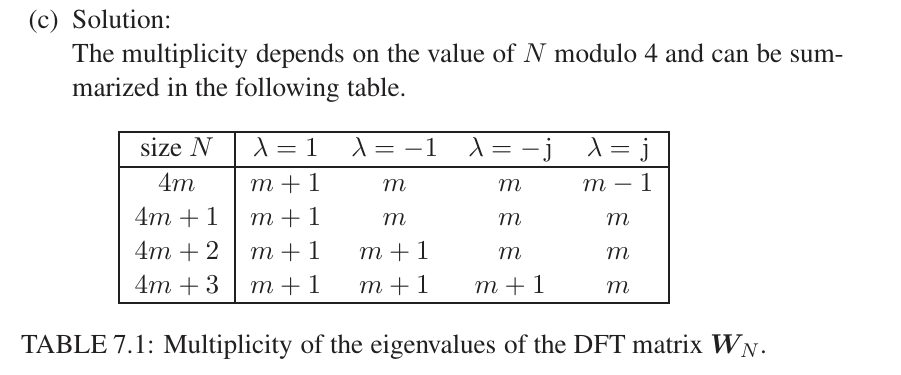

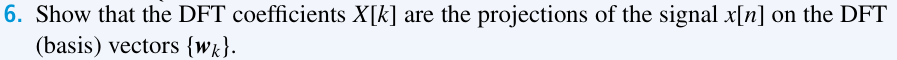

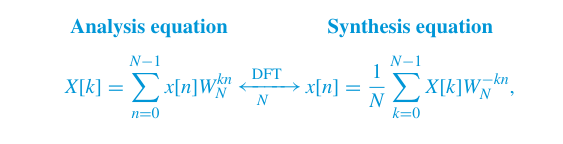

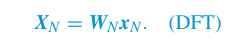

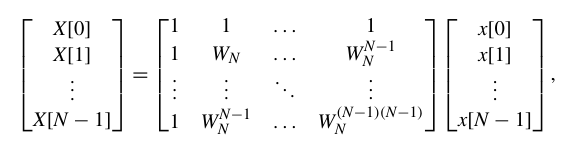

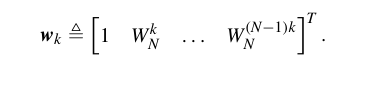

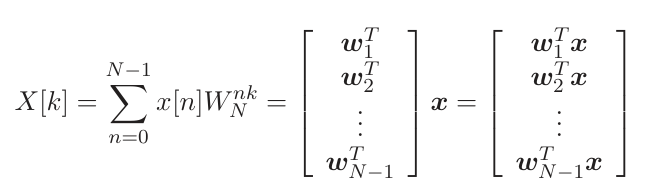

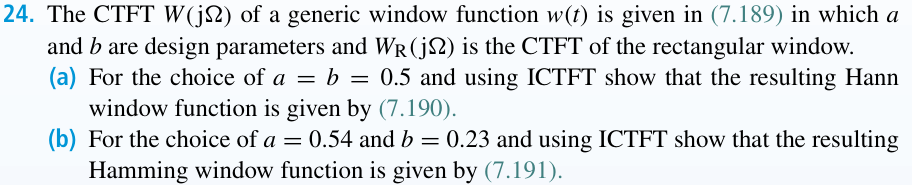

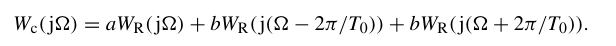

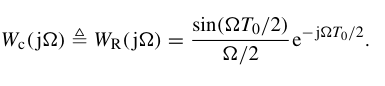

# a)

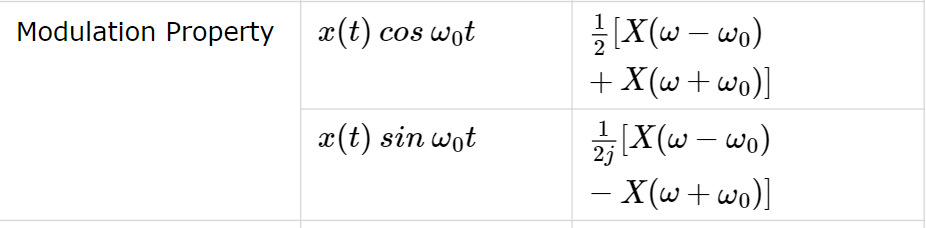

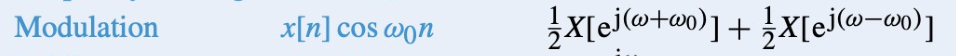

\begin{align*}
W_c (j\Omega)&=a W_R (j\Omega)+b W_R (j(\Omega -2\pi /T_o))+b W_R (j\Omega +2\pi /T_0)\\
w_c(t)&=aw_r(t)+2bcos(2\pi /T_0 t)w_r(t)\\\\
w_c(t)&=0.5w_r(t)+cos(2\pi /T_0 t)w_r(t)\\
\end{align*}

# b)

\begin{align*}
W_c (j\Omega)&=a W_R (j\Omega)+b W_R (j(\Omega -2\pi /T_o))+b W_R (j\Omega +2\pi /T_0)\\
w_c[n]&=aw_r[n]+2bcos(2\pi /T_0 t)\\\\
w_c[n]&=0.54w_r[n]+0.46cos(2\pi /T_0 t)\\
\end{align*}